In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_means_with_confidence_intervals(data_dict, title=None, ylabel=None):
    """
    Plots means of each dataset with 95% confidence intervals for multiple models.

    Parameters:
    - data_list: List of numpy arrays, each representing data from a different model.
    """
    # Initialize lists to store the means, lower, and upper bounds of the 95% CI
    means = []
    lower_bound = []
    upper_bound = []
    
    # Iterate over the data list to compute means and confidence intervals
    for data in data_dict.values():
        mean = np.mean(data)
        sem = stats.sem(data)
        ci = sem * stats.t.ppf((1 + 0.95) / 2., len(data) - 1)
        
        means.append(mean)
        lower_bound.append(mean - ci)
        upper_bound.append(mean + ci)

    # X-axis positions for each model
    x = np.arange(1, len(data_dict) + 1)
    
    # Create the plot
    plt.plot(x, means, marker='o', color='b', label='Means')
    plt.fill_between(x, lower_bound, upper_bound, color='b', alpha=0.2, label='95% CI')

    # Labels and formatting
    plt.xticks(x, data_dict.keys())
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

def plot_boxplots(data_dict, title=None, ylabel=None):
    """
    Plots boxplots for multiple models/datasets.

    Parameters:
    - data_dict: Dictionary where keys are model names and values are numpy arrays representing data.
    - title: Optional title for the plot.
    - ylabel: Optional label for the y-axis.
    """
    
    # Prepare the data and labels for the boxplot
    data = list(data_dict.values())
    labels = list(data_dict.keys())
    
    # Create the box plot
    plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    # Labels and formatting
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.grid()

    # Show the plot
    plt.show()

def load_json(path):
    with open(path) as file:
        d = json.load(file)
    return d

In [12]:
# Load the MSE values from the JSON files
with open('/simurgh/u/alanqw/experiments/__eval__test_asregularization_pretrain_reg_paired_brainageregression_flatten_batch1_lr0.0001/eval/summary_unimodal.json', 'r') as file:
    summary_unimodal_regularized = json.load(file)
    
with open('/simurgh/u/alanqw/experiments/__eval__test_baseline_brainageregression_flatten3_batch1_lr0.0001/eval/summary_unimodal.json', 'r') as file:
    summary_unimodal = json.load(file)

with open('/simurgh/u/alanqw/experiments/__eval__test_brainmorph_brainageregression_batch1_lr0.0001/eval/summary_unimodal.json', 'r') as file:
    summary_brainmorph = json.load(file)

# Extract MSE values
mse_unimodal = summary_unimodal['mse']
mse_unimodal_regularized = summary_unimodal_regularized['mse']
mse_brainmorph = summary_brainmorph['mse']
print(np.array(mse_unimodal).mean())
print(np.array(mse_unimodal_regularized).mean())
print(np.array(mse_brainmorph).mean())

print(np.median(np.array(mse_unimodal)))
print(np.median(np.array(mse_unimodal_regularized)))
print(np.median(np.array(mse_brainmorph)))

# Create boxplots with updated x-axis labels
plt.figure(figsize=(10, 6))
plt.boxplot([mse_unimodal, mse_unimodal_regularized, mse_brainmorph], labels=['Randomly initialized', 'RYL Regularized', 'BM'], showfliers=False)
# plt.plot(['Baseline', 'RYL Regularized', 'BM'], [np.mean(mse_unimodal), np.mean(mse_unimodal_regularized), np.mean(mse_brainmorph)])#, xticklabels=['Randomly initialized', 'RYL Regularized'])
plt.title('Brain Age Regression')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/simurgh/u/alanqw/experiments/__eval__test_asregularization_pretrain_reg_paired_brainageregression_flatten_batch1_lr0.0001/eval/summary_unimodal.json'

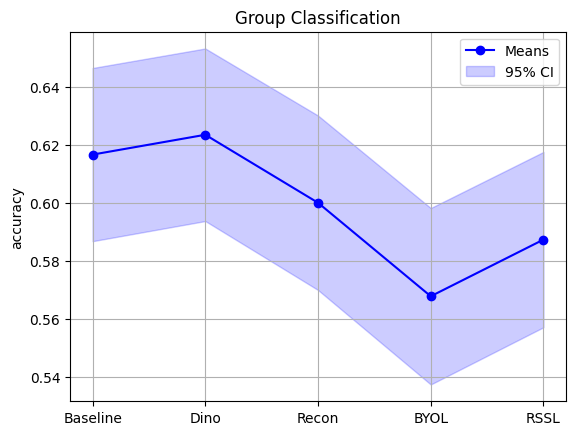

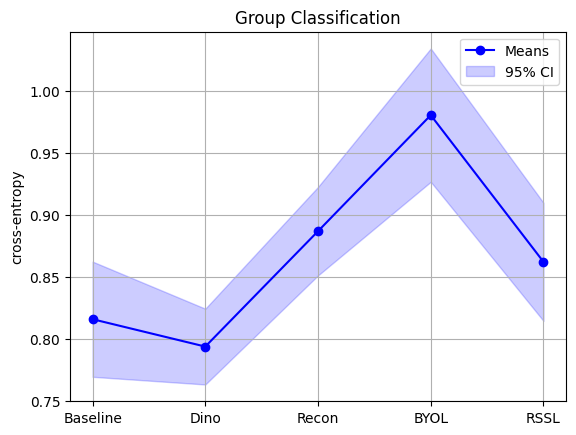

In [ ]:
# with open('/simurgh/u/alanqw/experiments/__eval__baseline_affaug_group_avgpool_epoch29650_batch1_lr0.0001/eval/summary_unimodal.json', 'r') as file:
#     summary_affaug = json.load(file)
    
data_dict = {
    # 'Baseline': load_json('/simurgh/u/alanqw/experiments/__eval__test_baseline_group_avgpool_epoch28975_batch1_lr0.0001/eval/summary_unimodal.json'),
    # 'Baseline+Rotaug': load_json('/simurgh/u/alanqw/experiments/__eval__baseline_affaug_256x256x256_group_avgpool_epoch29650_batch1_lr0.0001/eval/summary_unimodal.json'),
    # 'Registration Encoder': load_json('/simurgh/u/alanqw/experiments/__eval__test_brainmorph_group_avgpool_epoch12000_batch1_lr0.0001/eval/summary_unimodal.json'),
    # 'RSSL': load_json('/simurgh/u/alanqw/experiments/__eval__avgdispmagnitude_vxmnumch3_group_avgpool_epoch41050_batch1_lr0.0001/eval/summary_unimodal.json'),
    'Baseline': load_json('/simurgh/u/alanqw/experiments/__eval__baseline_separatedsubjects_dataadni_batch1_lr0.0001/eval/summary_unimodal.json'),
    'Dino': load_json('/simurgh/u/alanqw/experiments/__eval__dino_separatedsubjects_dataadni_batch1_lr0.0001/eval/summary_unimodal.json'),
    'Recon': load_json('/simurgh/u/alanqw/experiments/__eval__recon_separatedsubjects_dataadni_batch1_lr0.0001/eval/summary_unimodal.json'),
    'BYOL': load_json('/simurgh/u/alanqw/experiments/__eval__byol_separatedsubjects_dataadni_batch1_lr0.0001/eval/summary_unimodal.json'),
    'RSSL': load_json('/simurgh/u/alanqw/experiments/__eval__rssldecode_separatedsubjects_dataadni_batch1_lr0.0001/eval/summary_unimodal.json'),
}
plot_means_with_confidence_intervals({k: v['acc'] for k, v in data_dict.items()}, title='Group Classification', ylabel='accuracy')
# plot_boxplots(data_dict)
plot_means_with_confidence_intervals({k: v['xe'] for k, v in data_dict.items()}, title='Group Classification', ylabel='cross-entropy')


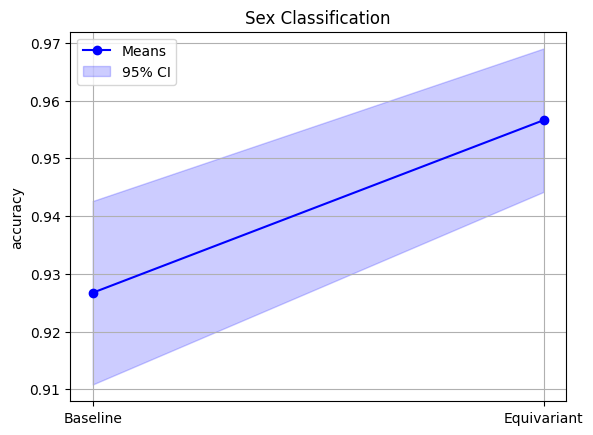

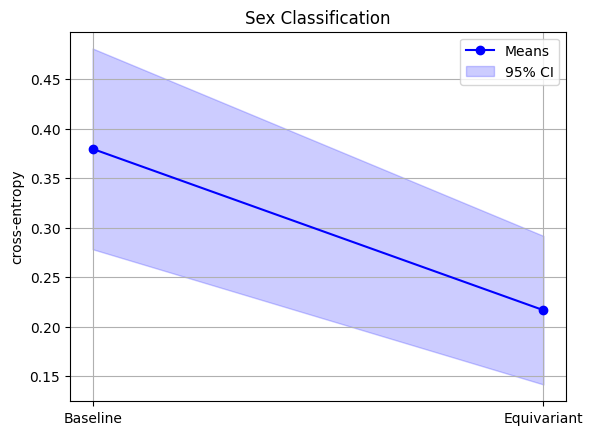

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the MSE values from the JSON files
with open('/simurgh/u/alanqw/experiments/__eval__test_baseline_sex_avgpool_epoch15000_batch1_lr0.0001/eval/summary_unimodal.json', 'r') as file:
    summary_unimodal = json.load(file)

with open('/simurgh/u/alanqw/experiments/__eval__test_brainmorph_sex_avgpool_epoch15000_batch1_lr0.0001/eval/summary_unimodal.json', 'r') as file:
    summary_brainmorph = json.load(file)

# Extract MSE values
mse_unimodal = summary_unimodal['acc']
mse_brainmorph = summary_brainmorph['acc']
data_dict = {
    'Baseline': mse_unimodal, 
    'Equivariant': mse_brainmorph,
}
plot_means_with_confidence_intervals(data_dict, title='Sex Classification', ylabel='accuracy')


# Extract MSE values
mse_unimodal = summary_unimodal['xe']
mse_brainmorph = summary_brainmorph['xe']
data_dict = {
    'Baseline': mse_unimodal, 
    'Equivariant': mse_brainmorph,
}
plot_means_with_confidence_intervals(data_dict, title='Sex Classification', ylabel='cross-entropy')


In [ ]:
import pickle 
import torch
import numpy as np
import matplotlib.pyplot as plt

from dataset import (
    adni_dataset,
    csv_dataset,
    nnunet_dataset,
    synapse_dataset,
    gigamed_dataset,
    t1_dataset,
    t1_fangrui_dataset,
    ppmi_dataset,
)
import torchio as tio
from rssl import utils as keymorph_utils

def get_data(args):
    if args.train_dataset == 't1':
        transform = tio.Compose(
            [
                tio.ToCanonical(),
                tio.CropOrPad((160, 192, 192), padding_mode=0, include=("img",)),
                tio.CropOrPad((160, 192, 192), padding_mode=0, include=("seg",)),
                tio.Lambda(keymorph_utils.rescale_intensity, include=("img",)),
            ]
        )
        dataset = t1_dataset.T1Dataset()

    elif args.train_dataset == 't1fangrui':
        transform = None
        dataset = t1_fangrui_dataset.T1FangruiDataset()

    # args.seg_available = dataset.seg_available
    # args.num_segmentations = 33  # num segmentations
    return {
        "transform": transform,
        "pretrain": dataset.get_pretrain_loader(
            args.batch_size,
            args.num_workers,
            transform=transform,
            paired=(True if args.pretrain_type in ["reg", "rssldecode"] else False),
        ),
        "train": dataset.get_train_loader(
            args.batch_size, args.num_workers, transform=transform, paired=False
        ),
        "val": dataset.get_val_loader(
            args.batch_size, args.num_workers, transform=transform, paired=False
        ),
        "eval": dataset.get_test_loader(
            args.batch_size, args.num_workers, transform=transform, paired=False
        ),
        "reference_subject": dataset.get_reference_subject(transform),
    }


In [ ]:
class Args:
    pass

args = Args()
args.batch_size = 1
args.num_workers = 0
args.pretrain_type = 'none'
args.train_dataset = 't1'
dataset = get_data(args)

args = Args()
args.batch_size = 1
args.num_workers = 0
args.pretrain_type = 'none'
args.train_dataset = 't1fangrui'
fangrui_dataset = get_data(args)

Processing dataset: /simurgh/u/alanqw/data/metadata/abcd/paths_and_info_flexpath.pkl
Available splits: dict_keys(['train', 'val', 'test'])
Processing train split
1
2
3
4
Processing val split
1
2
3
4
Processing test split
1
2
3
4
Total train subjects so far: 11
Total val subjects so far: 11
Total test subjects so far: 11
Processing dataset: /simurgh/u/alanqw/data/metadata/adni_t1/paths_and_info_flexpath.pkl
Available splits: dict_keys(['train', 'val', 'test'])
Processing train split
1
2
3
4
Processing val split
1
2
3
4
Processing test split
1
2
3
4
Total train subjects so far: 22
Total val subjects so far: 22
Total test subjects so far: 22
Processing dataset: /simurgh/u/alanqw/data/metadata/hcp_ag_t1/paths_and_info_flexpath.pkl
Available splits: dict_keys(['train', 'val', 'test'])
Processing train split
1
2
3
4
Processing val split
1
2
3
4
Processing test split
1
2
3
4
Total train subjects so far: 33
Total val subjects so far: 33
Total test subjects so far: 33
Processing dataset: /simur

In [ ]:
train_loader = dataset['train']
train_loader_fangrui = fangrui_dataset['train']

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


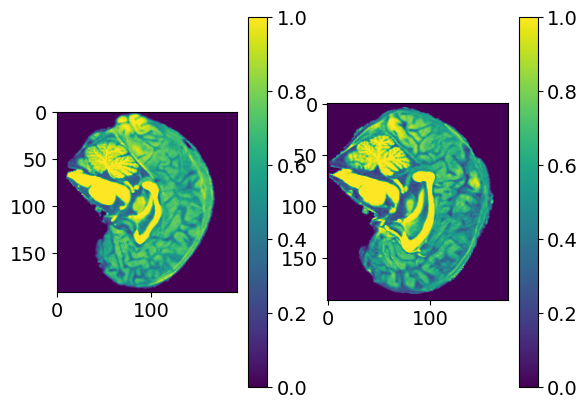

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


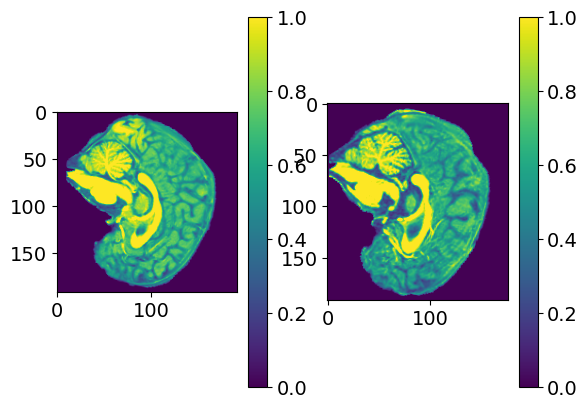

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


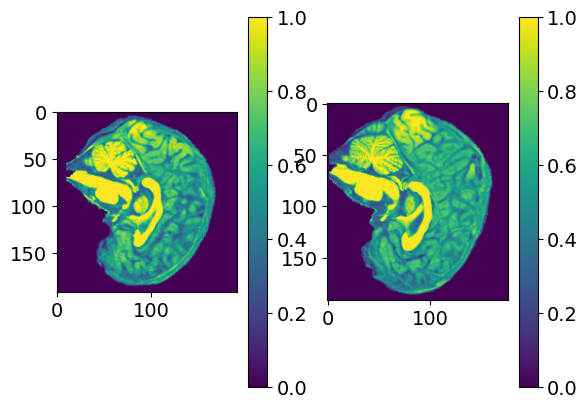

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


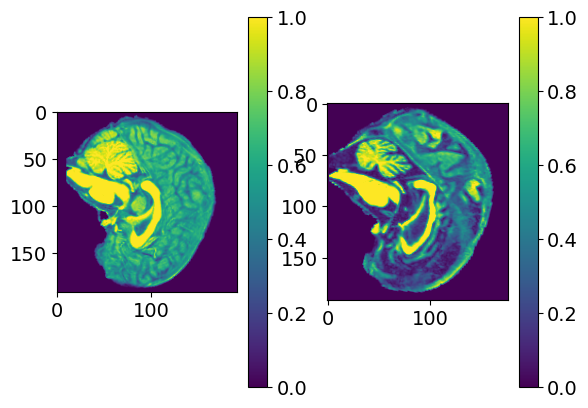

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


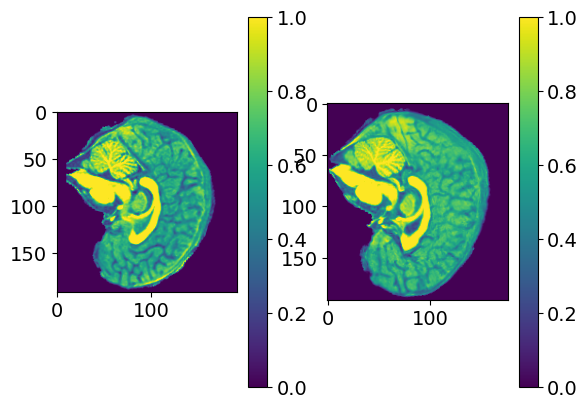

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


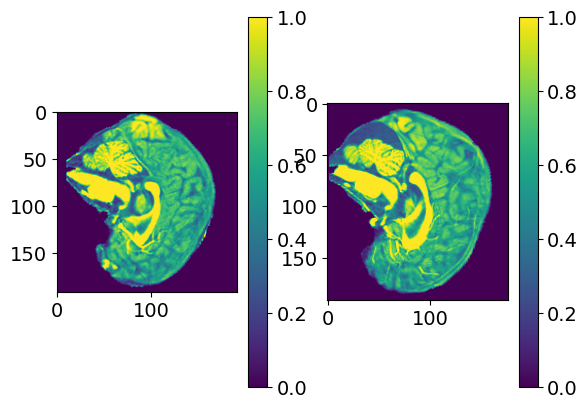

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


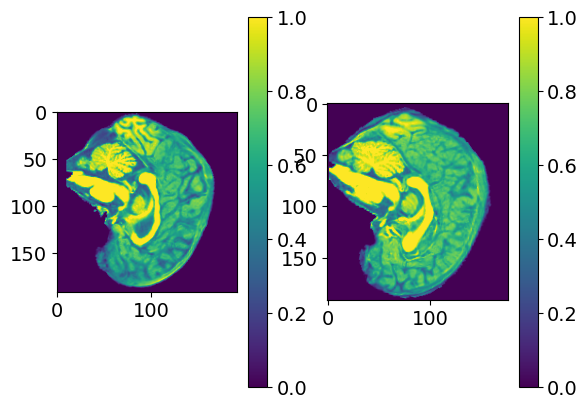

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


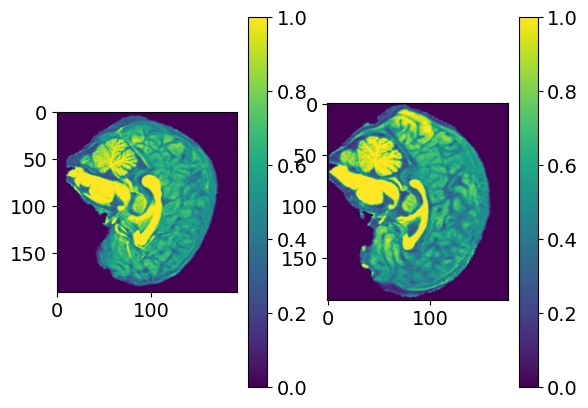

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


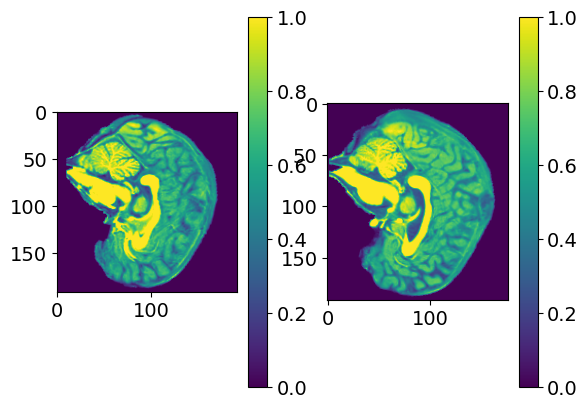

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


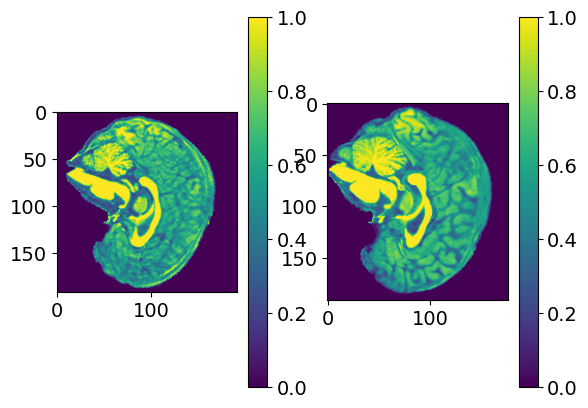

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


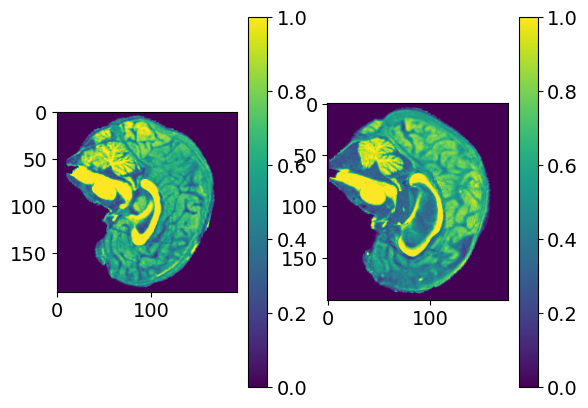

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


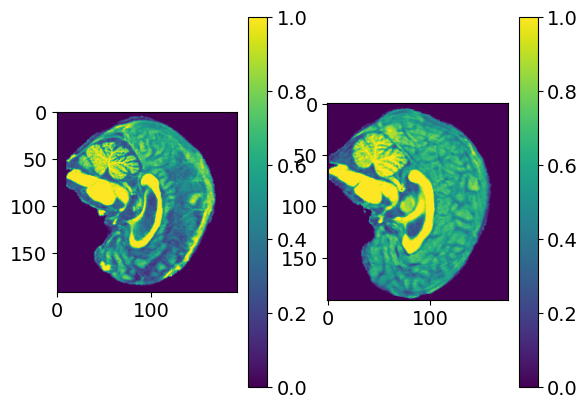

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


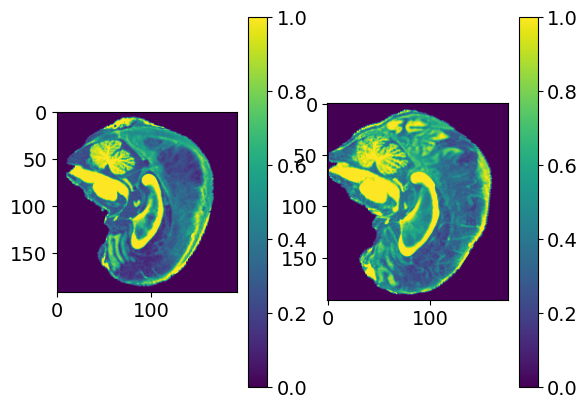

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


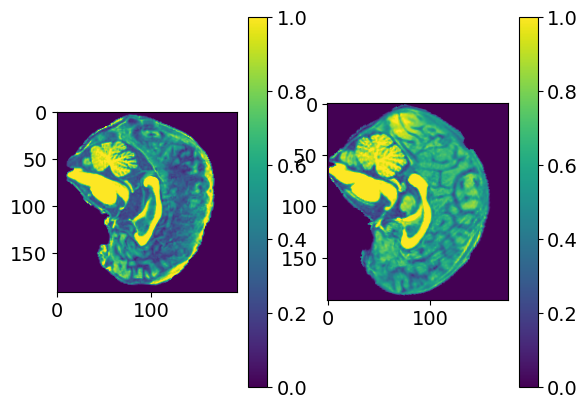

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


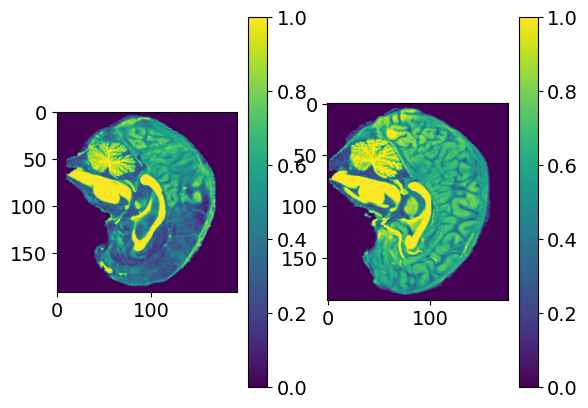

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


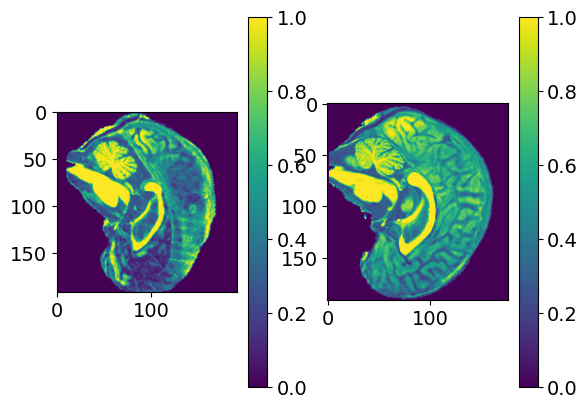

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


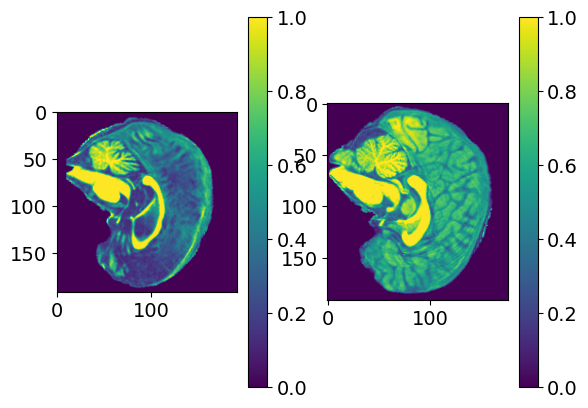

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


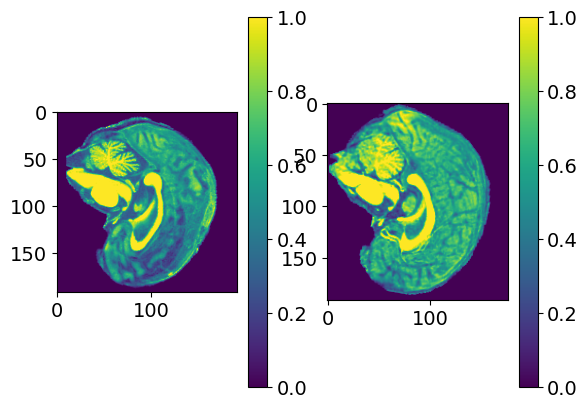

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


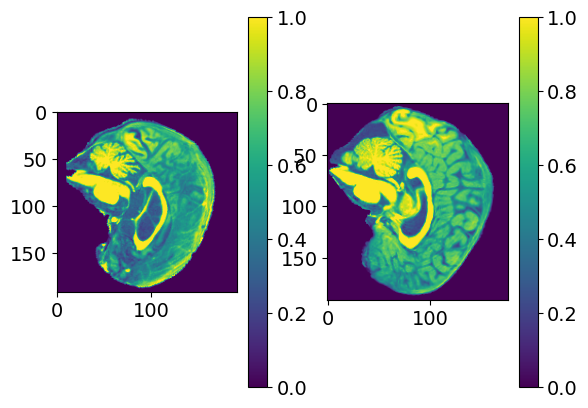

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


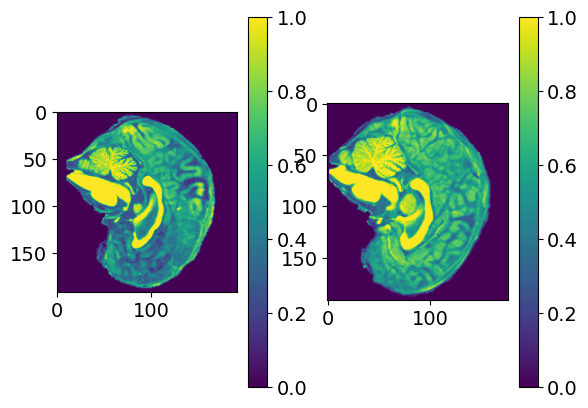

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


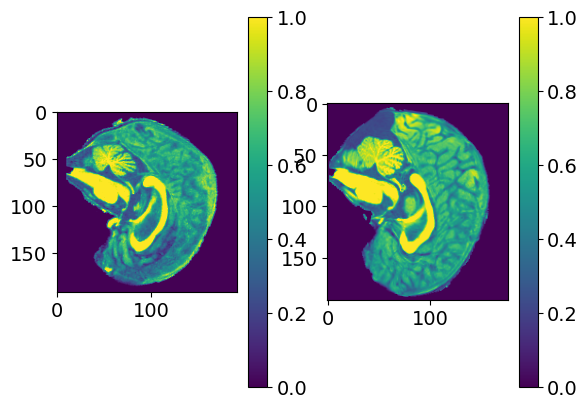

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


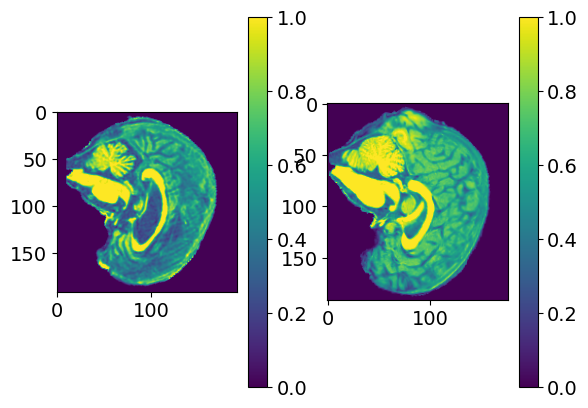

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


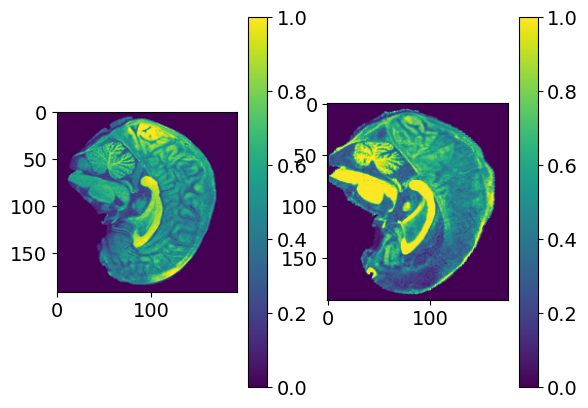

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


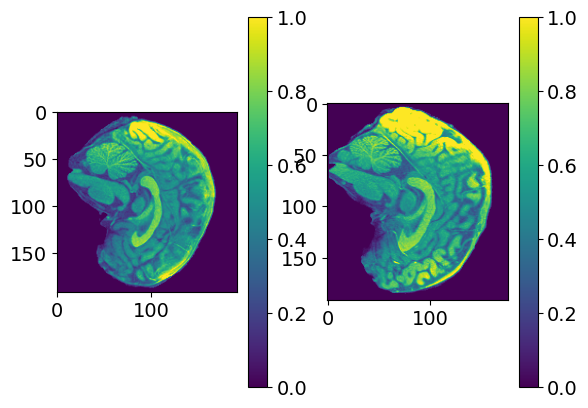

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


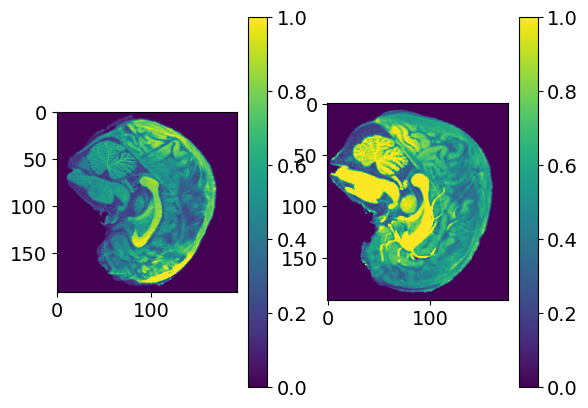

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


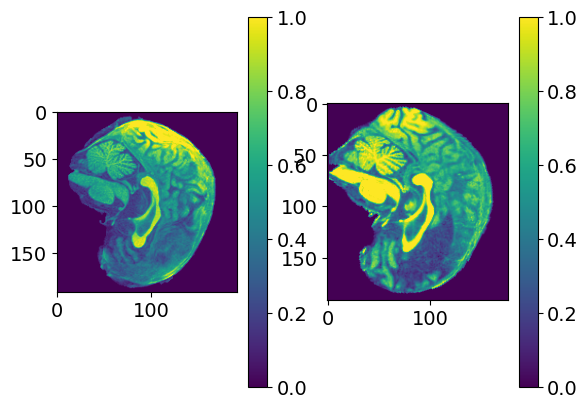

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


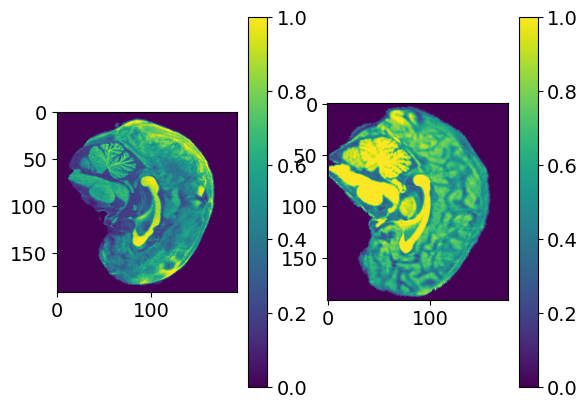

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


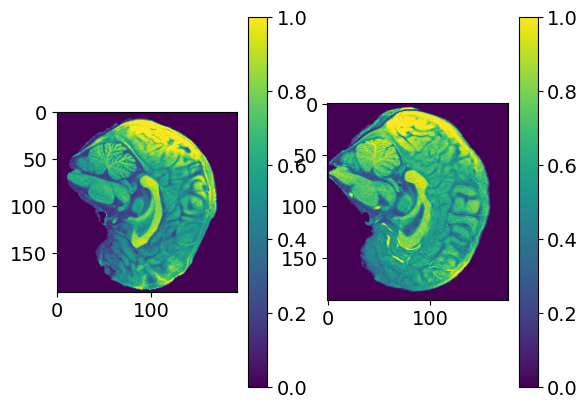

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


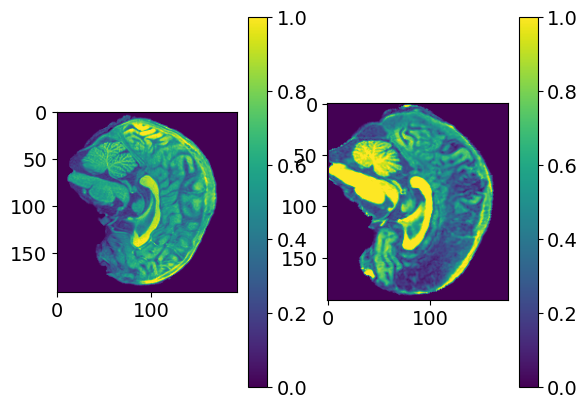

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


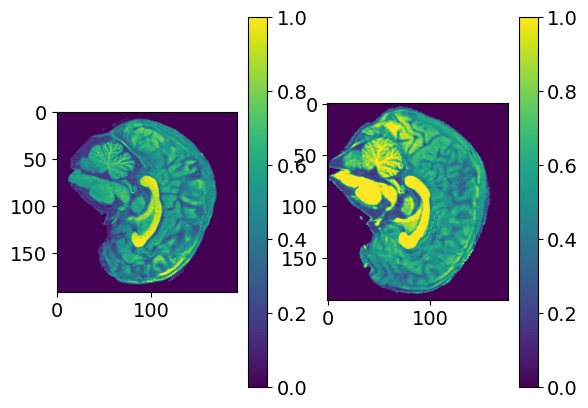

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


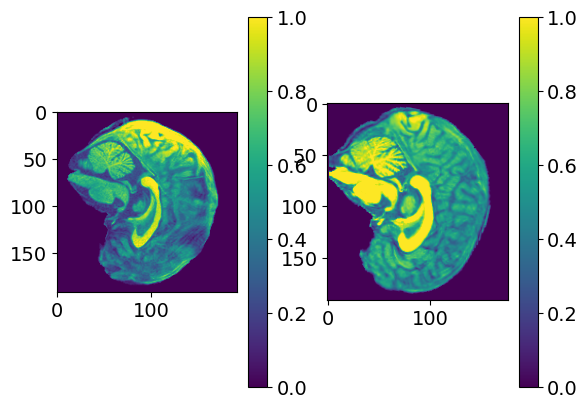

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


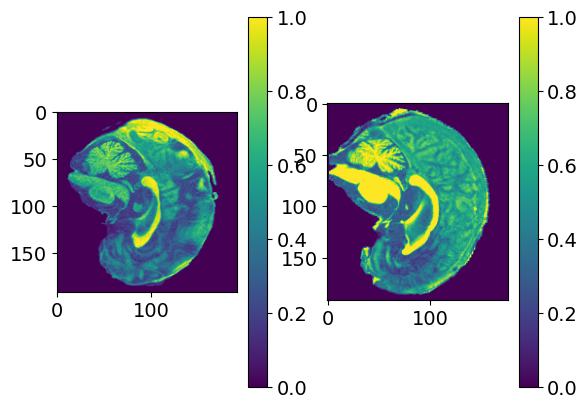

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


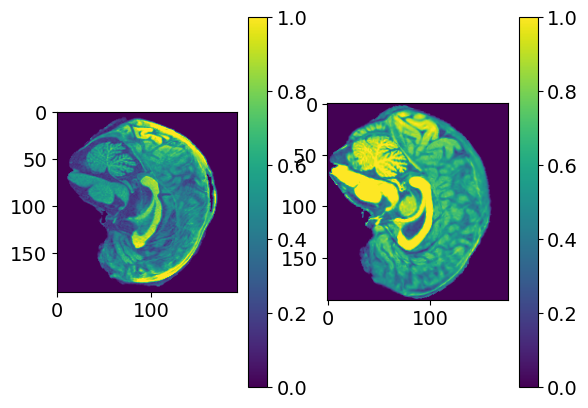

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


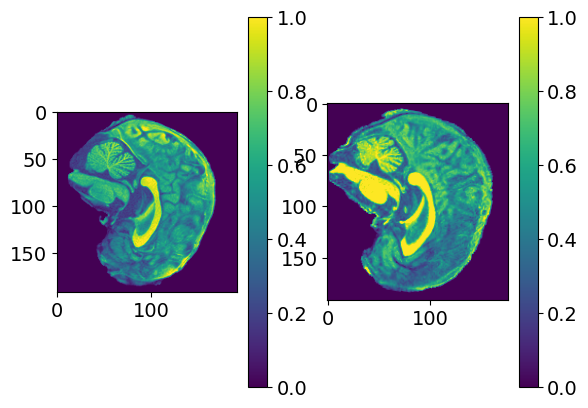

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


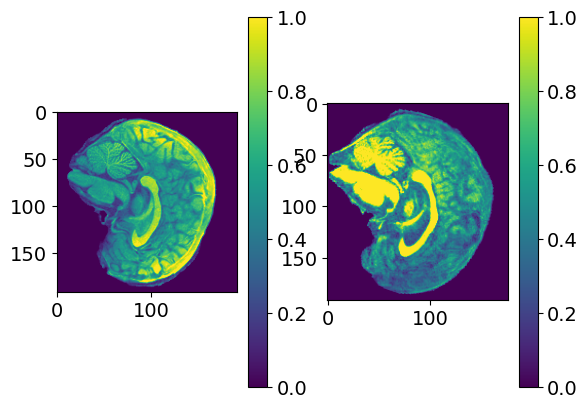

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


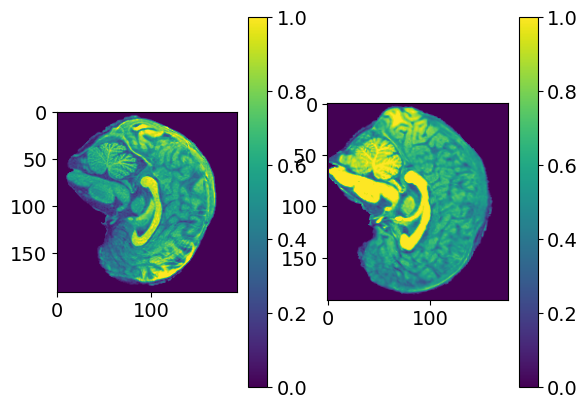

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


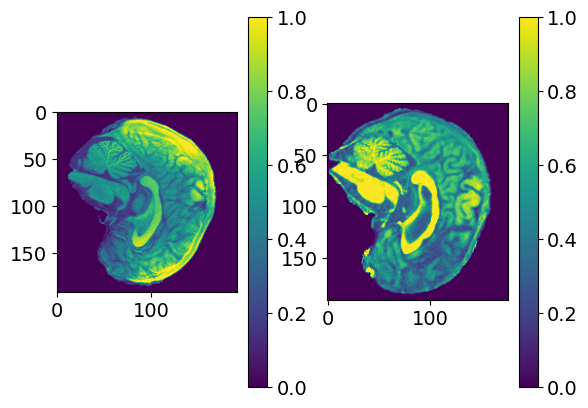

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


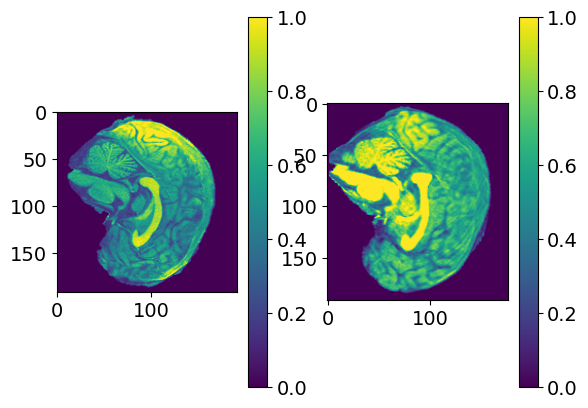

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


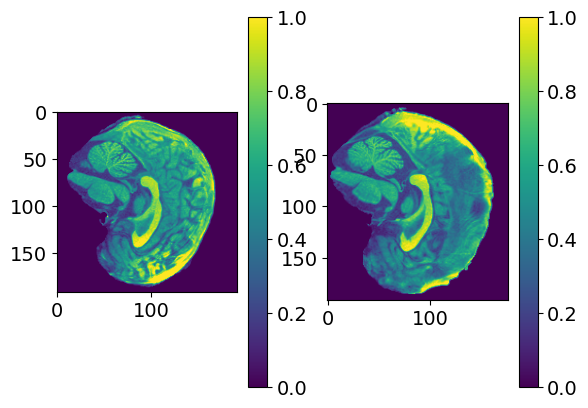

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


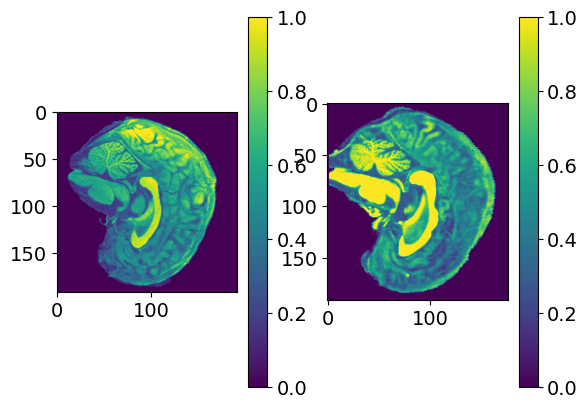

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


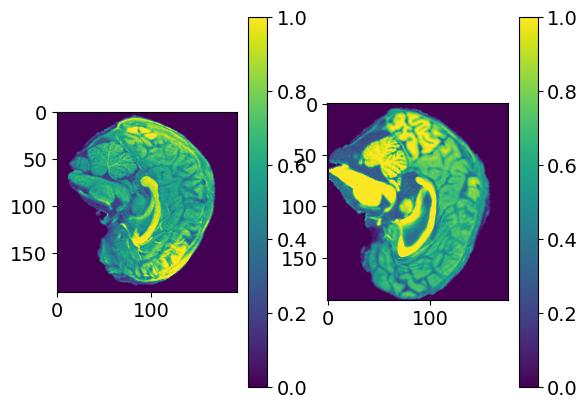

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


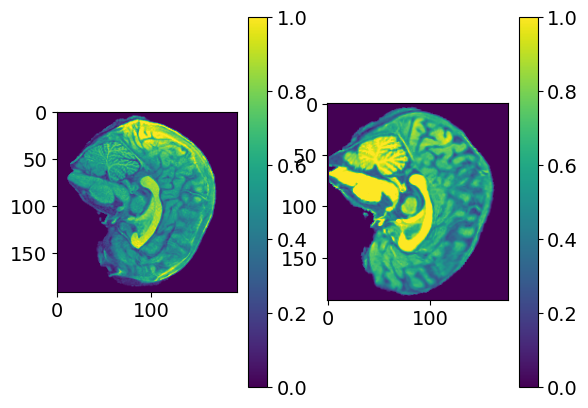

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


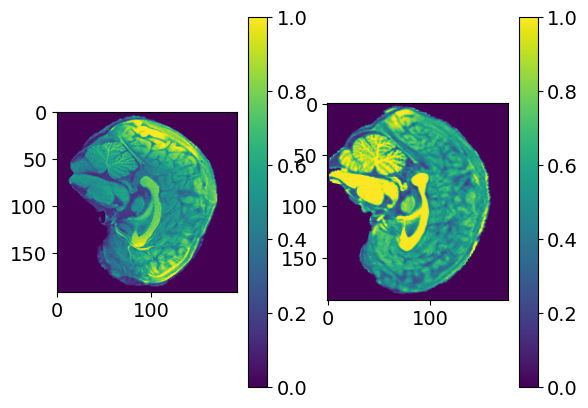

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


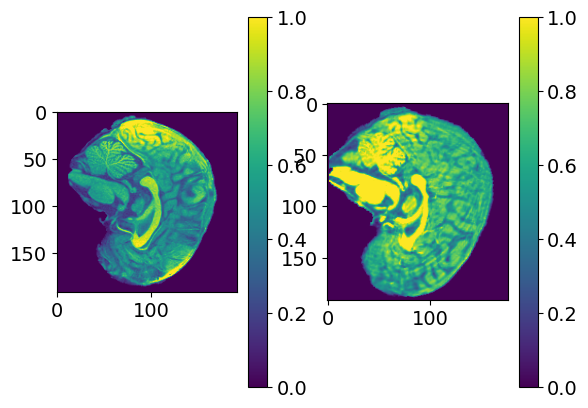

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


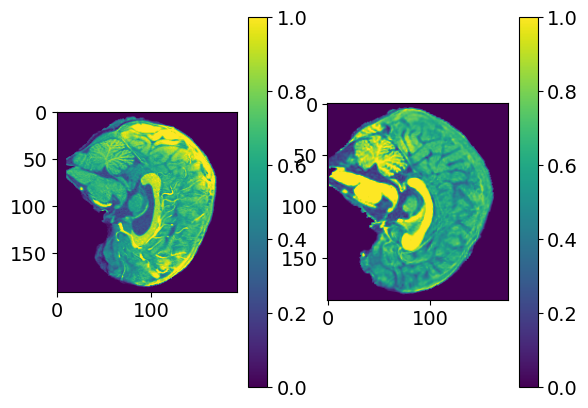

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


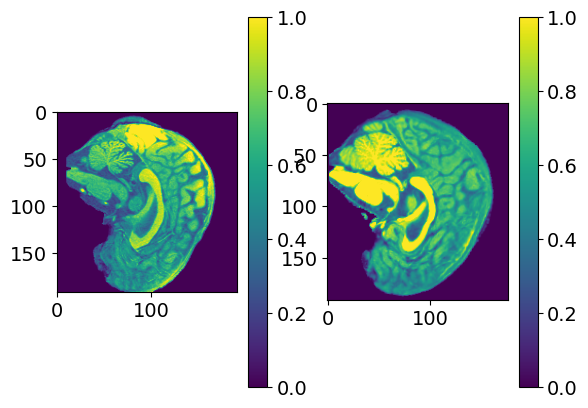

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


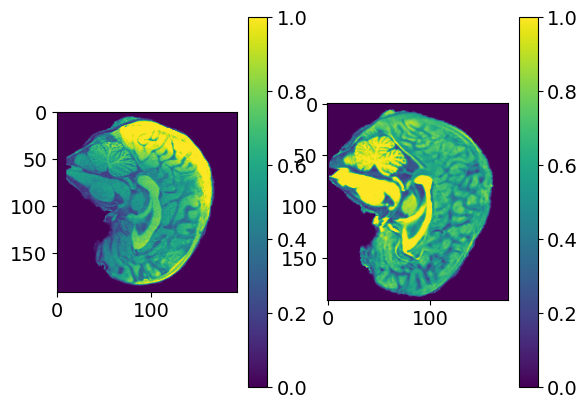

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


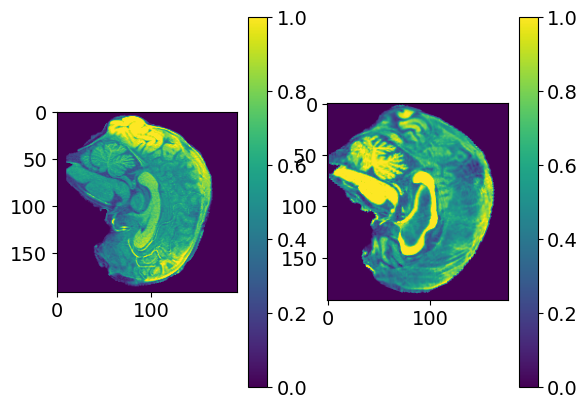

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


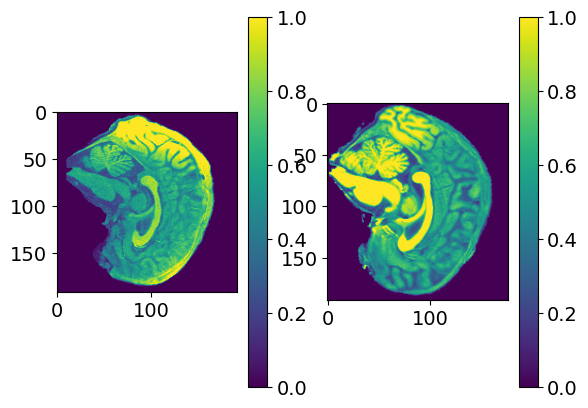

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


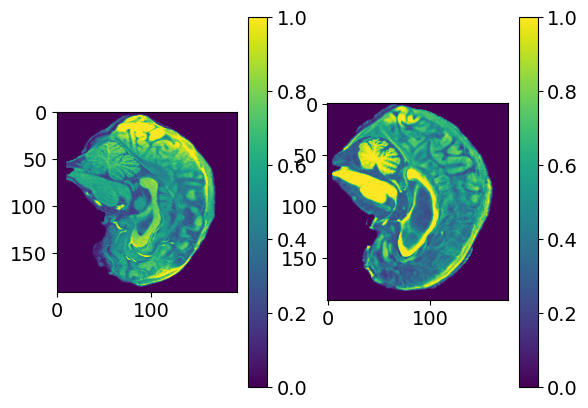

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


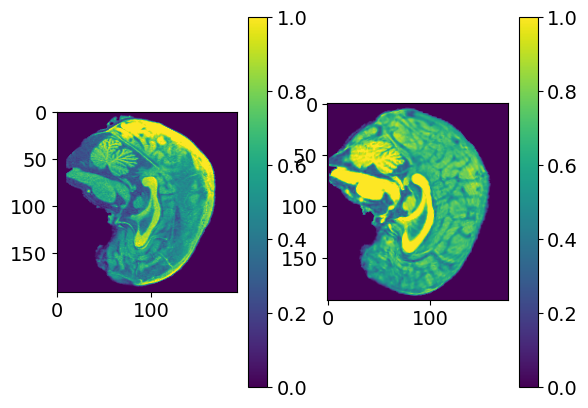

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


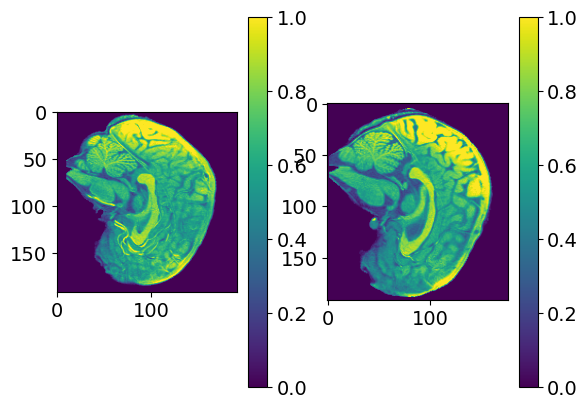

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


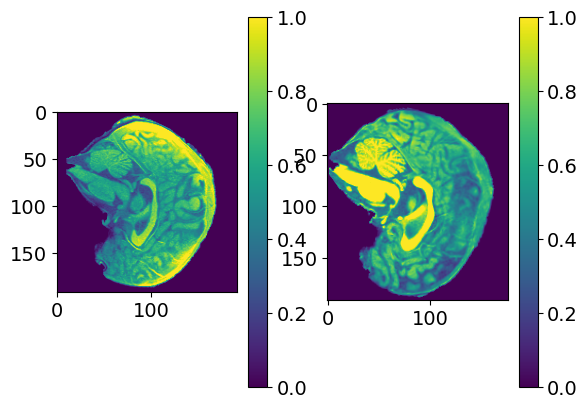

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


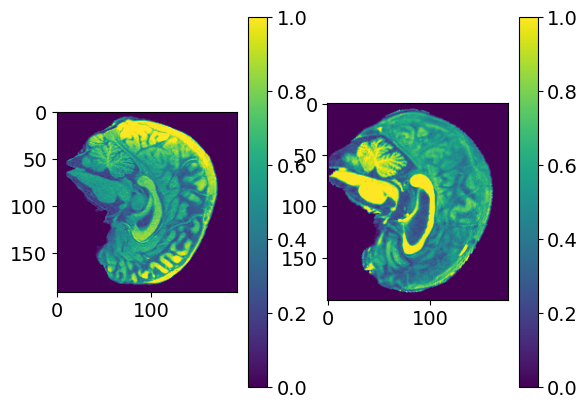

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


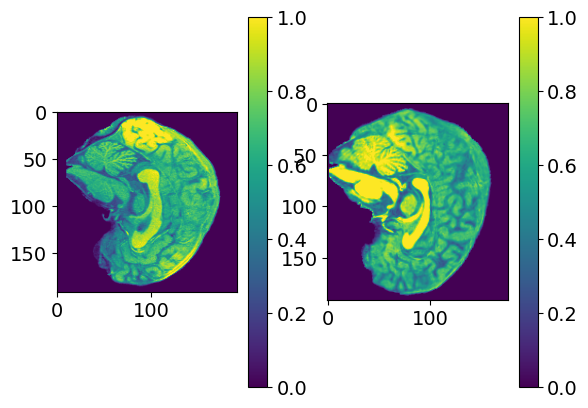

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


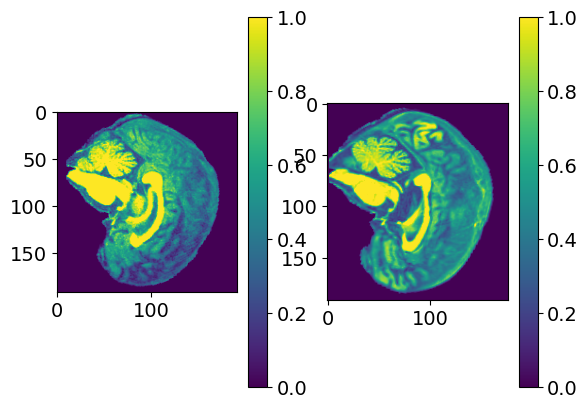

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


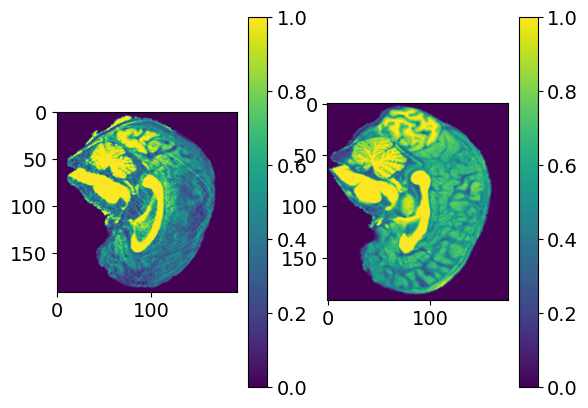

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


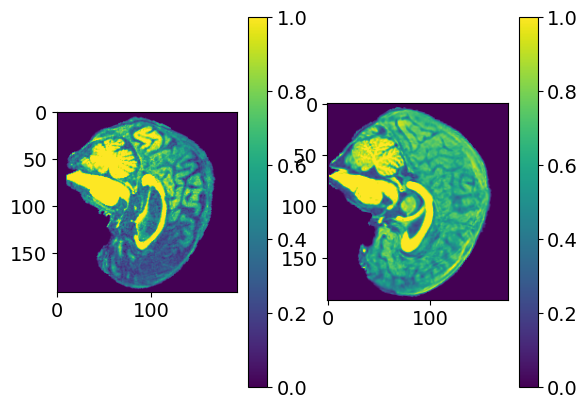

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


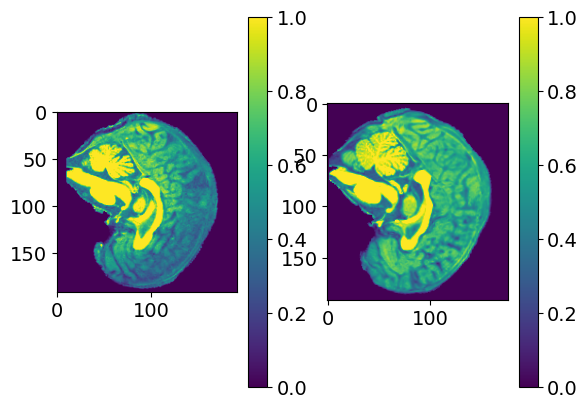

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


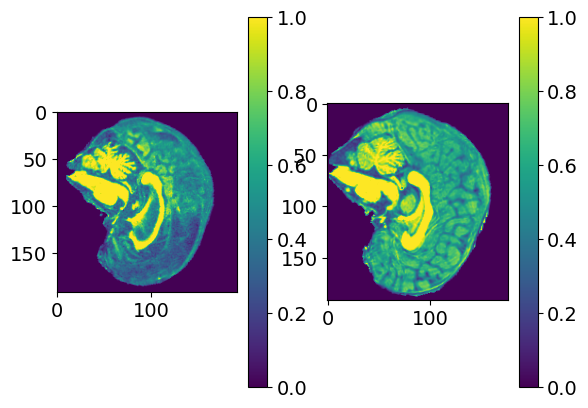

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


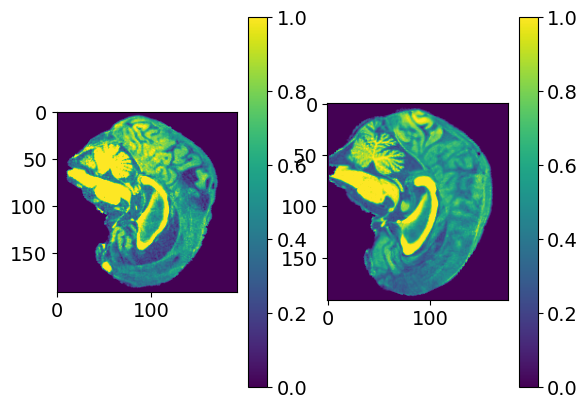

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


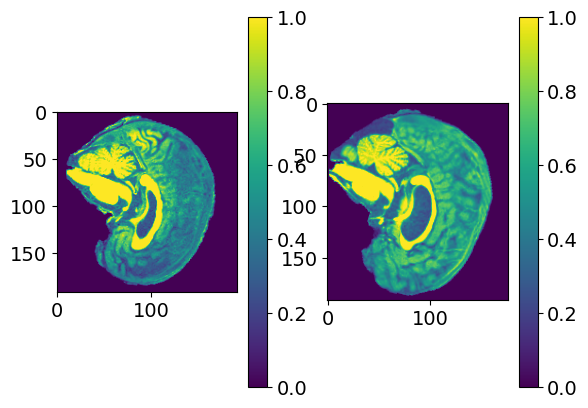

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


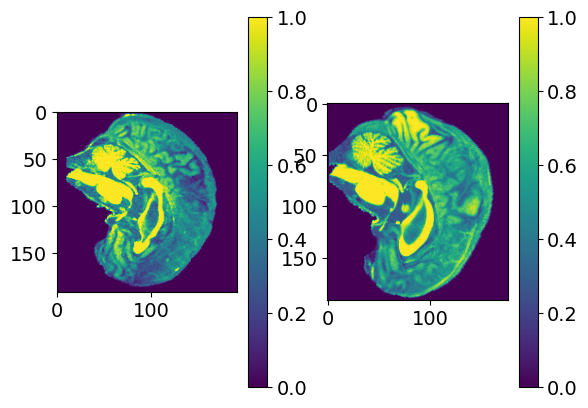

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


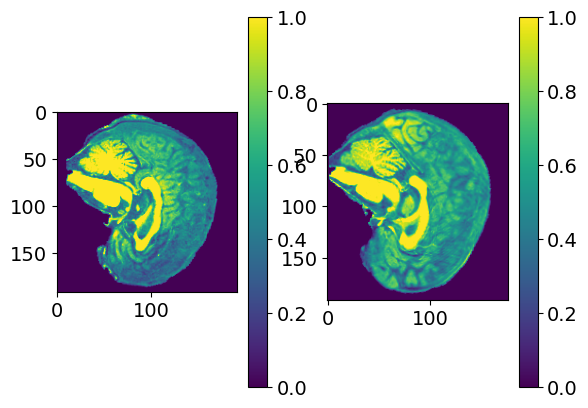

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


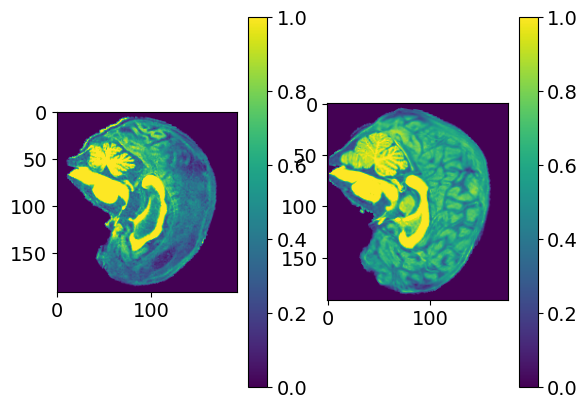

torch.Size([1, 1, 160, 192, 192]) torch.Size([1, 1, 160, 192, 176])


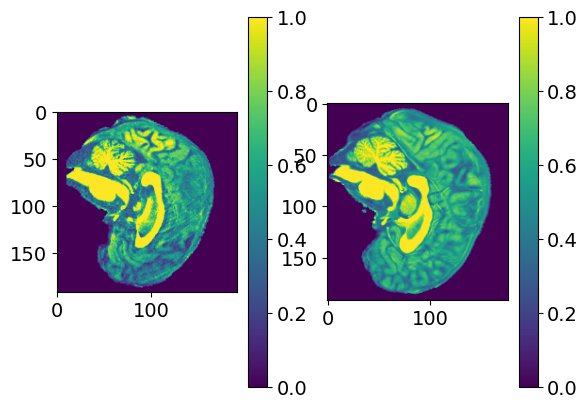

In [10]:
for i, (batch, batch_fangrui) in enumerate(zip(train_loader, train_loader_fangrui)):
    image = batch['img']['data']
    image_fangrui = batch_fangrui['image']
    print(image.shape, image_fangrui.shape)
    
    fig, axes = plt.subplots(1, 2)
    im1 = axes[0].imshow(image[0, 0, 80])
    im2= axes[1].imshow(image_fangrui[0, 0, 80])
    fig.colorbar(im1, ax=axes[0])
    fig.colorbar(im2, ax=axes[1])
    plt.show()